# Lesson 1 Notebook

## Introduction to NetworkX

You can use NetworkX to construct and draw graphs that are undirected or directed, with weighted or unweighted edges. An array of functions to analyze graphs is available. This notebook takes you through a few basic examples and exercises.

## The `import` statement

Recall that `import` statements go at the top of your code, telling Python to load an external module. In this case we want to load NetworkX, but give it a short alias `nx` since we'll have to type it repeatedly, hence the `as` statement.

Lines starting with the `%` character are not Python code, they are "magic" directives for Jupyter notebook. The `%matplotlib inline` magic tells Jupyter Notebook to draw graphics inline i.e. in the notebook. This magic should be used right after the import statement.

In [1]:
import pandas as pd #module to work with dataframes
import networkx as nx #module to work with networks
import numpy as np
from Functions import *
#%matplotlib inline

NameError: name 'register_cell_magic' is not defined

## Creating and drawing simple graphs
Let's start by seeing an exaple of how can we generate from scartch an undirected graph using the `Graph` function

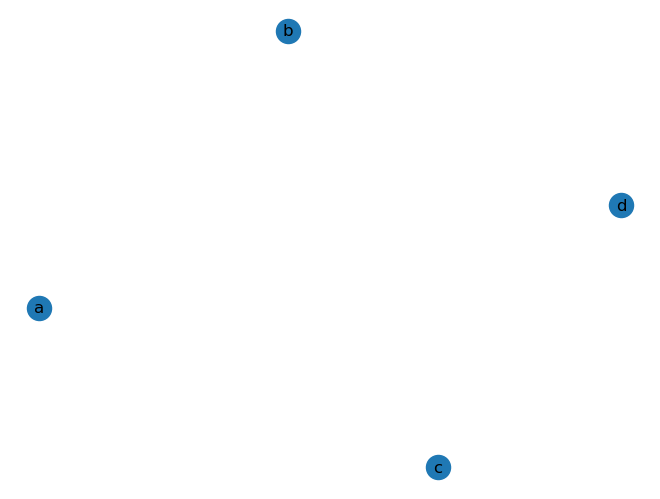

In [2]:
# a "plain" graph is undirected, create the empty graph
G = nx.Graph()

# you can add nodes to the graph. Give each node a 'name', which is a letter in this case.
G.add_node('a')

# the add_nodes_from method allows adding nodes from a sequence, in this case a list, instead of doing one by one
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# let's see how it is going: draw the graph
nx.draw(G, with_labels=True)

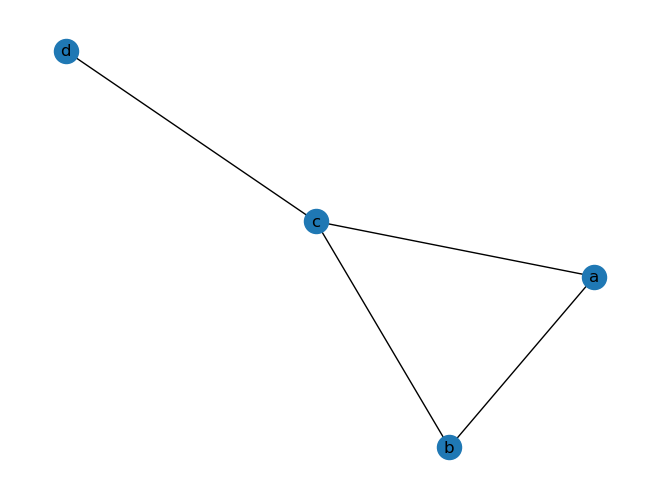

In [3]:
# We need to stablish relationships among these agents. Add and edge from 'a' to 'b'
# since this graph is undirected, the order doesn't matter here
G.add_edge('a', 'b')

# just like add_nodes_from, we can add edges from a sequence, not one by one
# edges should be specified as 2-tuples, that is using these "(" ")" braquets
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# draw the graph
nx.draw(G, with_labels=True)

There are many optional arguments to the draw function to customize the appearance.

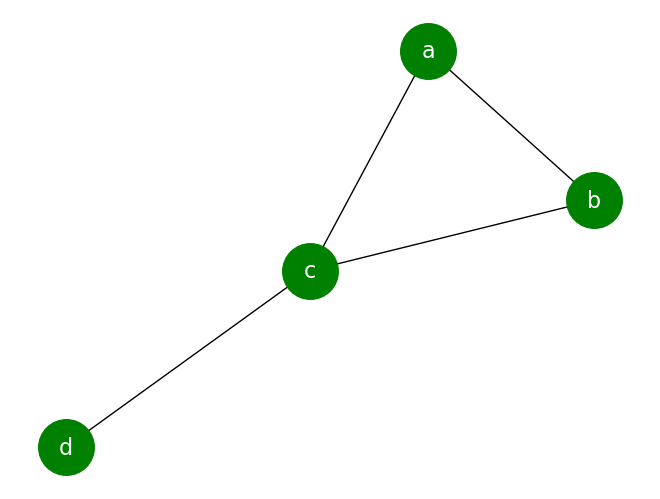

In [4]:
nx.draw(G,
        with_labels=True,
        node_color='green',
        node_size=1600,
        font_color='white',
        font_size=16,
        )

<div class="alert alert-block alert-success"><b>Up to you: </b>
<h3> Exercise 1</h3>
Create the undirected graph corresponding to this simple network

![title](./images/figure1.png)
</div>

In [5]:
# write your code here and run it ################

In [6]:
# SOLUTION:  Uncomment the following line to see the solution
#%load ./snippets/ex1.py

## Creating non-simple Graphs - Edge properties
As we have seen, we can add different attributes to edges and nodes to enrich the information contained in the network. Usually much information can be incuding regarding the "interaction" between a couple of nodes. The most frequent examples are direction and weigth.

### Directed graphs
Unless otherwise specified, we assume graph edges are undirected -- they are symmetric and go both ways. But some relationships, e.g. predator-prey relationships, are asymmetric and best represented as directed graphs. NetworkX provides the `DiGraph` class for directed graphs. Let's create a **Directed graph** (take notice they are a different class from the undirected basic `Graph` class)

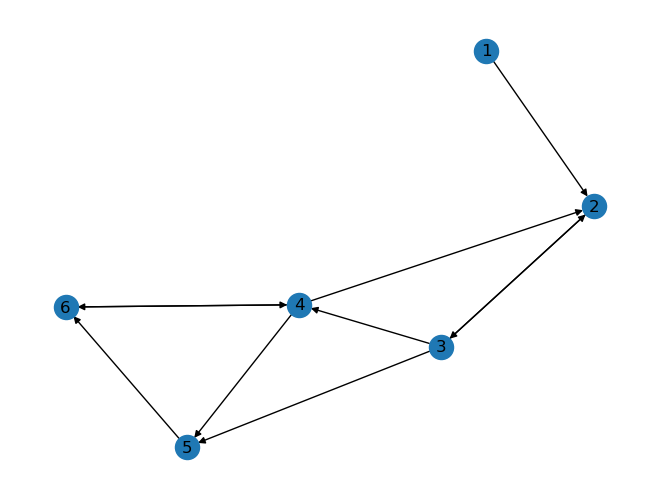

In [7]:
#creating a directed empty graph
D = nx.DiGraph()

D.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)]) #add the edges (this automatically creates the nodes)

nx.draw(D, with_labels=True)

Note that in the case of directed graphs the figure automatically displays the arrows indicating the direction of the edge. your turn!

<div class="alert alert-block alert-success"><b>Up to you: </b>
<h3> Exercise 2</h3>
Create the directed graph corresponding to this simple network

![title](./images/figure2.jpg)
</div>

In [8]:
# write your code here and run it 

In [9]:
# SOLUTION: Uncomment the following line to see the solution
#%load ./snippets/ex2.py

In [10]:
#%%bgc black
# Uncomment the following line to see the solution
# %load ./snippets/ex2.py

In [11]:
#set_background('#CCFFCC')
#set_background('black')


### Weighted graphs
We can add further information to the edges between nodes. Including the weigth of the interaction is very frequent. We can create a weighted network by adding the `ẁeigth` attribute to the edges in the network 

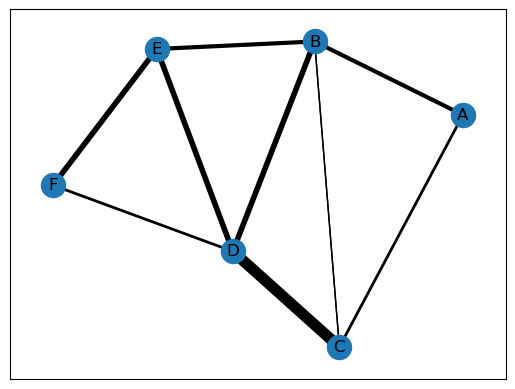

In [12]:
G = nx.Graph()

weighted_edges=[('A', 'B',3), ('A', 'C',2),('B', 'C',1),('B', 'E',3), ('C', 'D',8), ('E', 'F',4),('D', 'F',2),('B', 'D',4),('E', 'D',4)] #a lis ofweighted edges, note they have three values, node from, node to, and weight
G.add_weighted_edges_from(weighted_edges) #add the list of edges to the network

#now let's plot it
pos=nx.spring_layout(G) # we need to get the position of the nodes to after add the node labels
nx.draw_networkx(G,pos)
w = nx.get_edge_attributes(G,'weight') #get the edge attribute ẁeigth'
nx.draw_networkx_edges(G = G, pos = pos, edge_color='k', width=list(w.values())) #representing the weigth tih the thickness of the link
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels) #if you wat to see the weigth

### Custom attributes & MultiGraphs
In some cases we need to create our own attributes. For example imagine you have two social media netorks, the "blue app" and the "red app". you can keep the information of the social network that is connecting two given people by creating the atribute "color" (or any other of your choosing), like this

[(1, 2, {'app': 'red'}), (1, 5, {'app': 'red'}), (1, 3, {'app': 'blue'}), (2, 5, {'app': 'red'}), (5, 4, {'app': 'blue'}), (5, 3, {'app': 'blue'})]


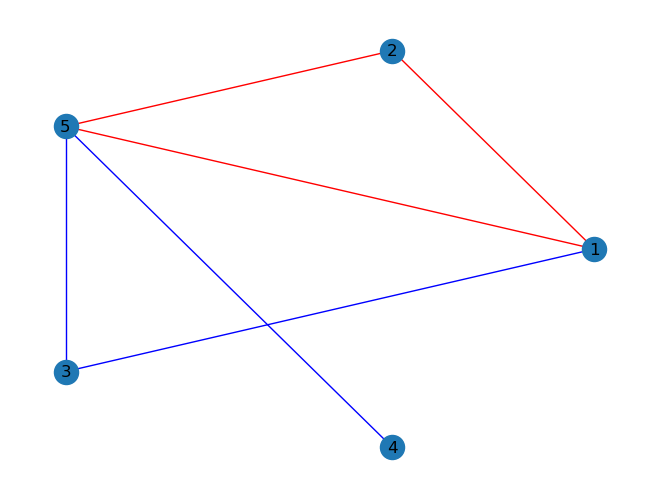

In [13]:
G = nx.Graph()
G.add_edge(1,2,app='red')
G.add_edge(1,5,app='red')
G.add_edge(2,5,app='red')
G.add_edge(1,3,app='blue')
G.add_edge(4,5,app="blue")
G.add_edge(3,5,app="blue")
print(G.edges(data=True)) #lets see those edges

#and now lets see the graph
pos = nx.circular_layout(G)
edges = G.edges()
colors = [G[u][v]['app'] for u,v in edges]
nx.draw(G, pos, edge_color=colors, with_labels=True)

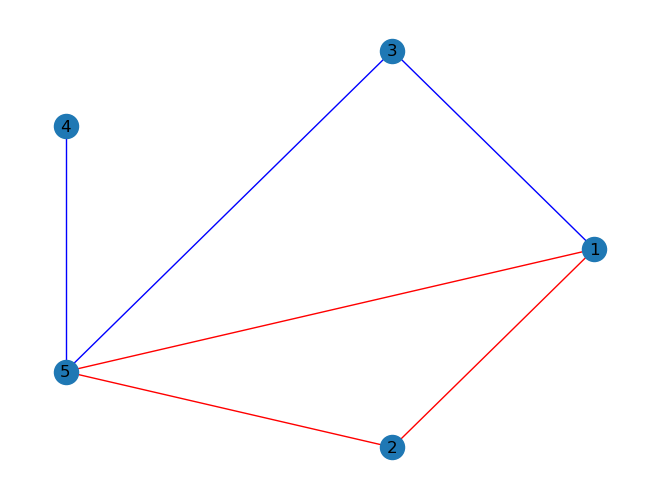

In [15]:
G = nx.Graph()
blue_edges_to_add = [(1, 3), (4, 5), (3, 5),(1,2)]
red_edges_to_add = [(1, 2), (1, 5), (2, 5)]
G.add_edges_from(blue_edges_to_add, app="blue")
G.add_edges_from(red_edges_to_add, app="red")

#and now lets see the graph
pos = nx.circular_layout(G)
edges = G.edges()
colors = [G[u][v]['app'] for u,v in edges]
nx.draw(G, pos, edge_color=colors, with_labels=True)

However, this only works if each pair is only connected by ONE type of app. If you want to have more than one class of edges between a pair of nodes, It is easier to include this extra information in the networkX format using `MultiGraph`. 
This allows you to have multiple types of edges between the nodes (parallel edges), one of each type.

[(1, 3, {'app': 'blue'}), (1, 2, {'app': 'blue'}), (1, 2, {'app': 'red'}), (1, 5, {'app': 'red'}), (3, 5, {'app': 'blue'}), (4, 5, {'app': 'blue'}), (5, 2, {'app': 'red'})]


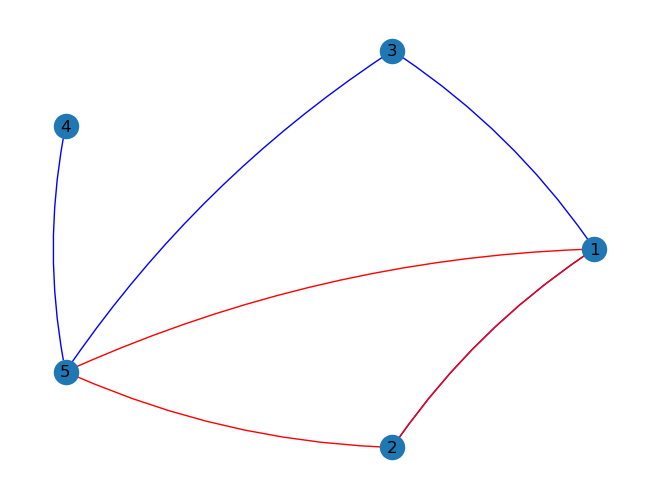

In [16]:
MG = nx.MultiGraph() #create empty multigraph
blue_edges_to_add = [(1, 3), (4, 5), (3, 5),(1,2)]
red_edges_to_add = [(1, 2), (1, 5), (2, 5)]
MG.add_edges_from(blue_edges_to_add, app="blue")
MG.add_edges_from(red_edges_to_add, app="red")

print(MG.edges(data=True)) #see the edges with the attributes
pos = nx.circular_layout(MG)
edges = MG.edges()

colors = []
for (u,v,attrib_dict) in list(MG.edges.data()): #they are a little more difficult to acess than the normal graphs, as you see
    colors.append(attrib_dict['app'])

nx.draw(MG, pos, edge_color=colors,connectionstyle='arc3, rad = 0.1', with_labels=True)


<div class="alert alert-block alert-success"><b>Up to you:</b>
<h3> Exercise 3</h3>
    
Create a Graph that contains all the information of these movements of people between 3 cities. The information below shows the number of people that travelled from the starting city, to the destination city using a given transportation method (either train, plane, or car). 
    
**Hint:** you can add weighted edges to a MultiGraph or MultiDiGraph with the method: MG.add_weighted_edges_from([list of weighted edges]), where the list of weighted edges has this form [(start node, end node, weigth), .... ] 

<img src="./images/figure3.png" width="500"/>
    
    
</div>

In [17]:
# write your code here and run it 
MDG = nx.MultiDiGraph()

In [19]:
# %load ./snippets/ex3.py
MDG = nx.MultiDiGraph()

train_edges=[("Sevilla", "Madrid", 1500), 
             ("Sevilla", "Barcelona", 100),
             ("Madrid", "Sevilla", 200),
             ("Barcelona", "Sevilla", 600),
             ("Madrid", "Barcelona",5000),
             ("Barcelona","Madrid",4000)]

plane_edges=[("Sevilla", "Madrid", 500), 
             ("Sevilla", "Barcelona", 100),
             ("Madrid", "Sevilla", 500),
             ("Barcelona", "Sevilla", 1000),
             ("Madrid", "Barcelona",3000),
             ("Barcelona","Madrid",3000)]

car_edges=[("Sevilla", "Madrid", 3000), 
             ("Sevilla", "Barcelona", 150),
             ("Madrid", "Sevilla", 1500),
             ("Barcelona", "Sevilla", 20),
             ("Madrid", "Barcelona",200),
             ("Barcelona","Madrid",1000)]


MDG.add_weighted_edges_from(train_edges, transport="train")
MDG.add_weighted_edges_from(plane_edges, transport="plane")
MDG.add_weighted_edges_from(car_edges, transport="car")

## Additionally we can also plot it
#pos = nx.spring_layout(MDG)
#nx.draw_networkx_nodes(MDG, pos)
#nx.draw_networkx_labels(MDG, pos)

#rad_dict={"car":0.1,"train":0.2,"plane":0.3}
#color_dict={"train":'#ff6666',"plane":'#ff9900',"car":'#00cc99'}

#for edge in MDG.edges(data=True):
 #   #print(edge)
  #  #print(edge[2]["transport"])
   # #print(edge[2]["weight"])
    #rad=rad_dict[edge[2]["transport"]]
    #color=color_dict[edge[2]["transport"]]
    #w=np.log(edge[2]["weight"]/50)
    #nx.draw_networkx_edges(G, pos, edgelist=[(edge[0],edge[1])], connectionstyle=f'arc3, rad = {rad}',edge_color=color,width=w)

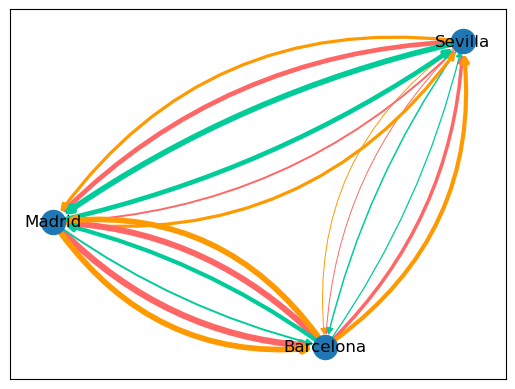

In [20]:
#visualize it
draw_colored_multigraph(MDG)

These are what are know as multi-layered networks, where each layer usually represents one different type of interaction among the agents. In the particular case where the agents are the same in all layers of interactions, they are called multiplex networks. 
To work with them I recommend using this python library: Pymnet 
https://mnets.github.io/pymnet/index.html

You have a comparative of softwares in the supp. material of the course.


## Creating non-simple Graphs - Node properties
In some cases we have different clases of nodes, for examples actors and films, writers and books, plants and pollinators. In this case the interactions only take place between nodes of different sets. These types of networks are called **bipartite nnetworks** (because we have two different types of nodes), or multipartite networks if we have more than two different sets. Now, the attribute belongs to the **node**, not to the link. 

### Bipartite graphs
This type of networks are very used, and networkx has its own section to work with them, the `bipartite` algorithm section. NetworkX does **not** have a custom bipartite graph class but the Graph() or DiGraph() classes can be used to represent bipartite graphs. However, you have to keep track of which set each node belongs to, and make sure that there is no edge between nodes of the same set. The convention used in NetworkX is to use a node attribute named `bipartite` with values 0 or 1 to identify the sets each node belongs to. This convention is not enforced in the source code of bipartite functions, it’s only a recommendation.. Let's see how we can create a bipartite network.

In [21]:
from networkx.algorithms import bipartite #we load the bipartite algorithms to facilitate writing the code

B = nx.Graph()

# Add nodes with the node attribute "bipartite" (you can choose any name for the attribute, and its values)
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)

# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])

BEWARE: Many algorithms of the bipartite module of NetworkX require, as an argument, a container with all the nodes that belong to one set, in addition to the bipartite graph B. 
The functions in the bipartite package do not check that the node set is actually correct nor that the input graph is actually bipartite. 

#### Obtaining the bipartite sets
If B is connected, you can find the two node sets using a two-coloring algorithm. However, if the input graph is not connected, there are more than one possible colorations, and raise an `AmbiguousSolution Exception` if the input graph for bipartite.sets is disconnected. In these cases, Using the bipartite node attribute, you can easily get the two node sets

In [22]:
#if B is connected, you can safely use the coloring algorithm to return the species sets
nx.is_connected(B)
bottom_nodes, top_nodes = bipartite.sets(B)
print(bottom_nodes)
print(top_nodes)

{1, 2, 3, 4}
{'a', 'c', 'b'}


In [23]:
#if B is not connected retrieve the node sets with the bipartite attribute:
top_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(B) - top_nodes
print(top_nodes)
print(bottom_nodes)

{1, 2, 3, 4}
{'a', 'c', 'b'}


<div class="alert alert-block alert-success"><b>Up to you:</b>
<h4> Exercise 4</h4>
    
Obtain the bipartite sets of the Bipartite network below (Bnet), by any of the methods explained above
    
</div>

In [24]:
#Genate a Bipartie network
Bnet=bipartite.random_graph(4, 5, 0.4, seed=None, directed=False)

In [25]:
# write your code here and run it 

In [26]:
# %load ./snippets/ex4.py
connected=nx.is_connected(Bnet)

#if network is connected then obtain the sets with the coloring algorithm
if connected:
    bottom_nodes, top_nodes = bipartite.sets(Bnet)
else:
    top_nodes = {n for n, d in Bnet.nodes(data=True) if d["bipartite"] == 0}
    bottom_nodes = set(Bnet) - top_nodes
    
print(top_nodes)
print(bottom_nodes)

{0, 1, 2, 3}
{4, 5, 6, 7, 8}


#### Visualizing bipartite networks
Bipartite networks are specially easy to identify when plotted using this layout

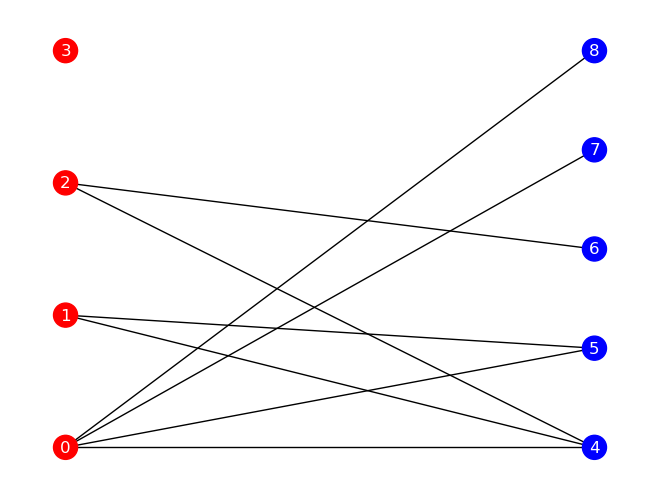

In [27]:
pos = nx.bipartite_layout(Bnet, top_nodes) #assing position to the nodes acoording to their bipartite property
color_dict={0:"red",1:"blue"} #dictionary of node color, each bipartite set is asociated to a different color
colors = [color_dict[node[1]['bipartite']] for node in Bnet.nodes(data=True)]
nx.draw(Bnet, pos, node_color=colors, with_labels=True,font_color='white')

#### One mode projection of bipartite networks
in some cases one is intersted on how the nodes of one of the sets is relatd to other nodes in the same set, trough their connections (for example what scientists have collaborated in papers). We can octain this with the one mode projection ofthe bipartite network with the `projected_graph` function. If we want to know how many shared pertners connect two nodes in a set (in how many papers two scientists have collaborated, for example) we can use the weighted version.

In [28]:
#unweighted version
top_graph = bipartite.projected_graph(Bnet, top_nodes)
bottom_nodes=bipartite.projected_graph(Bnet, bottom_nodes)

#or the weighted version
top_graph = bipartite.weighted_projected_graph(Bnet, top_nodes)
bottom_nodes=bipartite.weighted_projected_graph(Bnet, bottom_nodes)

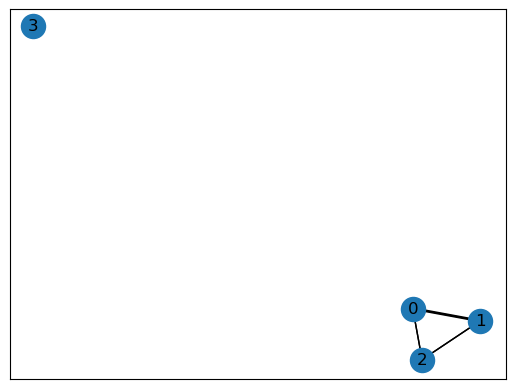

In [29]:
#now let's plot the weighted version
pos=nx.spring_layout(top_graph) # we need to get the position of the nodes to after add the node labels
nx.draw_networkx(top_graph,pos)
w = nx.get_edge_attributes(top_graph,'weight') #get the edge attribute ẁeigth'
nx.draw_networkx_edges(G = top_graph, pos = pos, edge_color='k', width=list(w.values())) #representing the weigth tih the thickness of the link
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels) #if you wat to see the weigth

## Reading and saving network files

Usually you will not have to create yourselve the network, but read it from a file. 
Data can be imported from many different sources and file formats: Adjacency List, Multiline Adjacency List, Edge List, GEXF, GML, Pickle, GraphML, JSON, LEDA, SparseGraph6, Pajek, GIS Shapefile and Matrix Market.

Let's see the most common ones.

In [30]:
#read databases
def load_crime_network():
    df = pd.read_csv(
        "./data/moreno_crime/out.moreno_crime_crime",
        sep=" ",
        skiprows=2,
        header=None,
    )
    df = df[[0, 1]]
    df.columns = ["personID", "crimeID"]
    df.index += 1

    # Read in the role metadata
    roles = pd.read_csv(
        "./data/moreno_crime/rel.moreno_crime_crime.person.role", header=None
    )
    roles.columns = ["roles"]
    roles.index += 1

    # Add the edge data to the graph.
    G = nx.Graph()
    for r, d in df.join(roles).iterrows():
        pid = "p{0}".format(d["personID"])  # pid stands for "Person I.D."
        cid = "c{0}".format(d["crimeID"])  # cid stands for "Crime I.D."
        G.add_node(pid, bipartite="person")
        G.add_node(cid, bipartite="crime")
        G.add_edge(pid, cid, role=d["roles"])

    # Read in the gender metadata
    gender = pd.read_csv(
       "./data/moreno_crime/ent.moreno_crime_crime.person.sex", header=None
    )
    gender.index += 1
    for n, gender_code in gender.iterrows():
        nodeid = "p{0}".format(n)
        G.nodes[nodeid]["gender"] = gender_code[0]

    return G

In [31]:
G = load_crime_network()

In [32]:
for n, d in G.nodes(data=True):
    G.nodes[n]["degree"] = G.degree(n)

In [33]:
G.nodes(data=True)

NodeDataView({'p1': {'bipartite': 'person', 'gender': 1, 'degree': 4}, 'c1': {'bipartite': 'crime', 'degree': 2}, 'c2': {'bipartite': 'crime', 'degree': 2}, 'c3': {'bipartite': 'crime', 'degree': 2}, 'c4': {'bipartite': 'crime', 'degree': 2}, 'p2': {'bipartite': 'person', 'gender': 1, 'degree': 22}, 'c5': {'bipartite': 'crime', 'degree': 2}, 'c6': {'bipartite': 'crime', 'degree': 3}, 'c7': {'bipartite': 'crime', 'degree': 1}, 'c8': {'bipartite': 'crime', 'degree': 2}, 'c9': {'bipartite': 'crime', 'degree': 1}, 'c10': {'bipartite': 'crime', 'degree': 2}, 'c11': {'bipartite': 'crime', 'degree': 4}, 'c12': {'bipartite': 'crime', 'degree': 2}, 'c13': {'bipartite': 'crime', 'degree': 3}, 'c14': {'bipartite': 'crime', 'degree': 13}, 'c15': {'bipartite': 'crime', 'degree': 2}, 'c16': {'bipartite': 'crime', 'degree': 2}, 'c17': {'bipartite': 'crime', 'degree': 2}, 'c18': {'bipartite': 'crime', 'degree': 1}, 'c19': {'bipartite': 'crime', 'degree': 8}, 'c20': {'bipartite': 'crime', 'degree': 3},

/home/vir/anaconda3/envs/net-course/lib/python3.12/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


<Axes: >

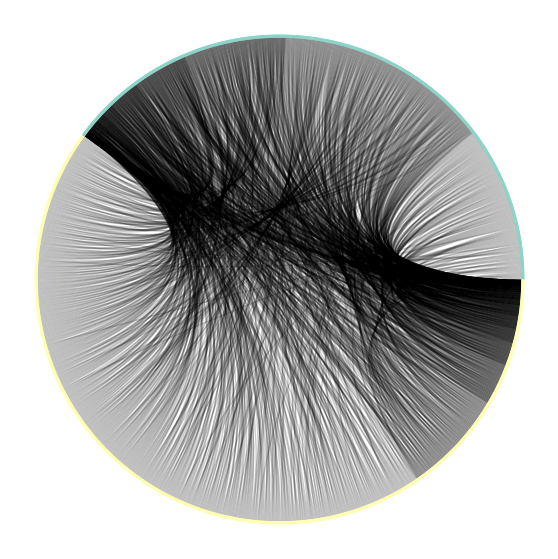

In [34]:
import nxviz as nv
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))
nv.circos(G, sort_by="degree", group_by="bipartite", node_color_by="bipartite", node_enc_kwargs={"size_scale": 3})

